In [2]:
# gerando função geradora da série ar1 e ar2
import numpy as np

def ar1(phi1, termo_erro, tempo):
    x = np.zeros(tempo)
    erro = np.random.normal(0, termo_erro, tempo)

    for t in range(tempo):
        x[t] = phi1 * x[t-1] + erro[t]

    return x

def ar2(phi1, phi2, termo_erro, tempo):
    x = np.zeros(tempo)
    erro = np.random.normal(0, termo_erro, tempo)

    for t in range(tempo):
        x[t] = phi1 * x[t-1] + phi2 * x[t-2] + erro[t]

    return x

In [3]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme_minimal


def plot_series(serie, title="Simulação"):

    df = pd.DataFrame({
    "tempo": range(len(serie)),
    "valor": serie
    })

    p = (
        ggplot(df, aes("tempo", "valor"))
        + geom_line(color="#2C3E50")
        + labs(title=title, x="Período", y="Valor")
        + theme_minimal()
    )

    p.show()

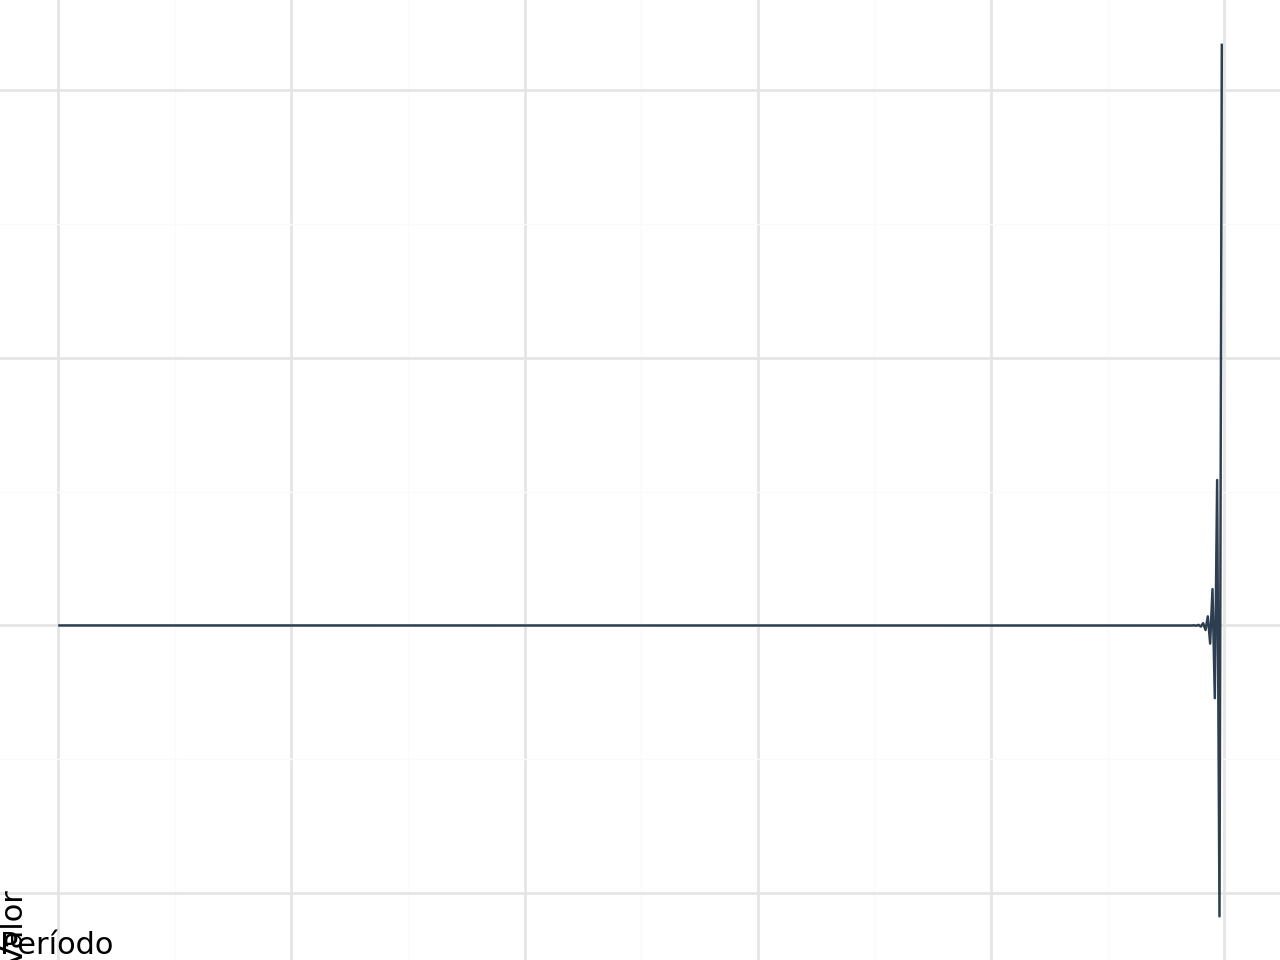

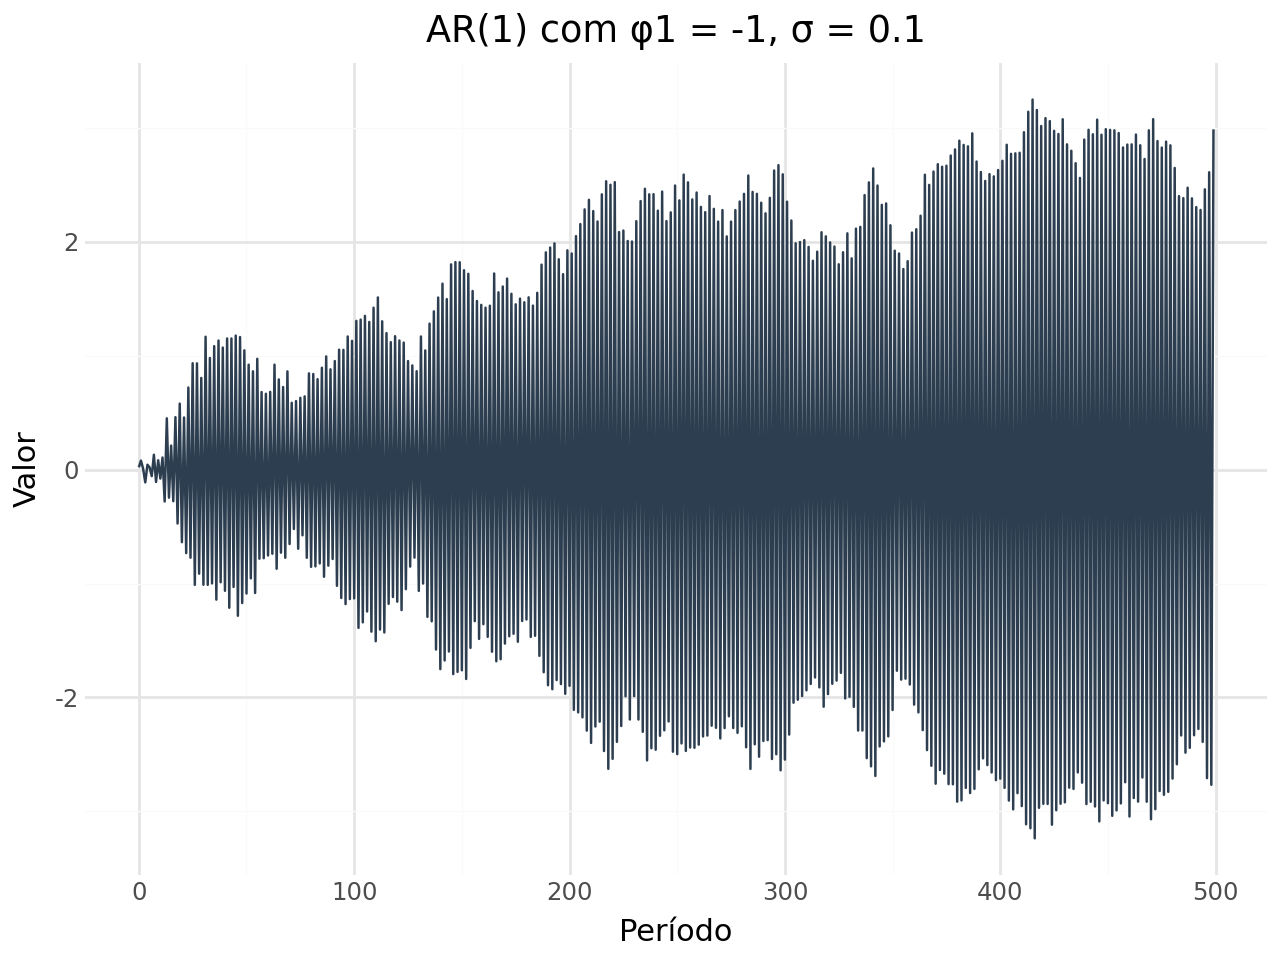

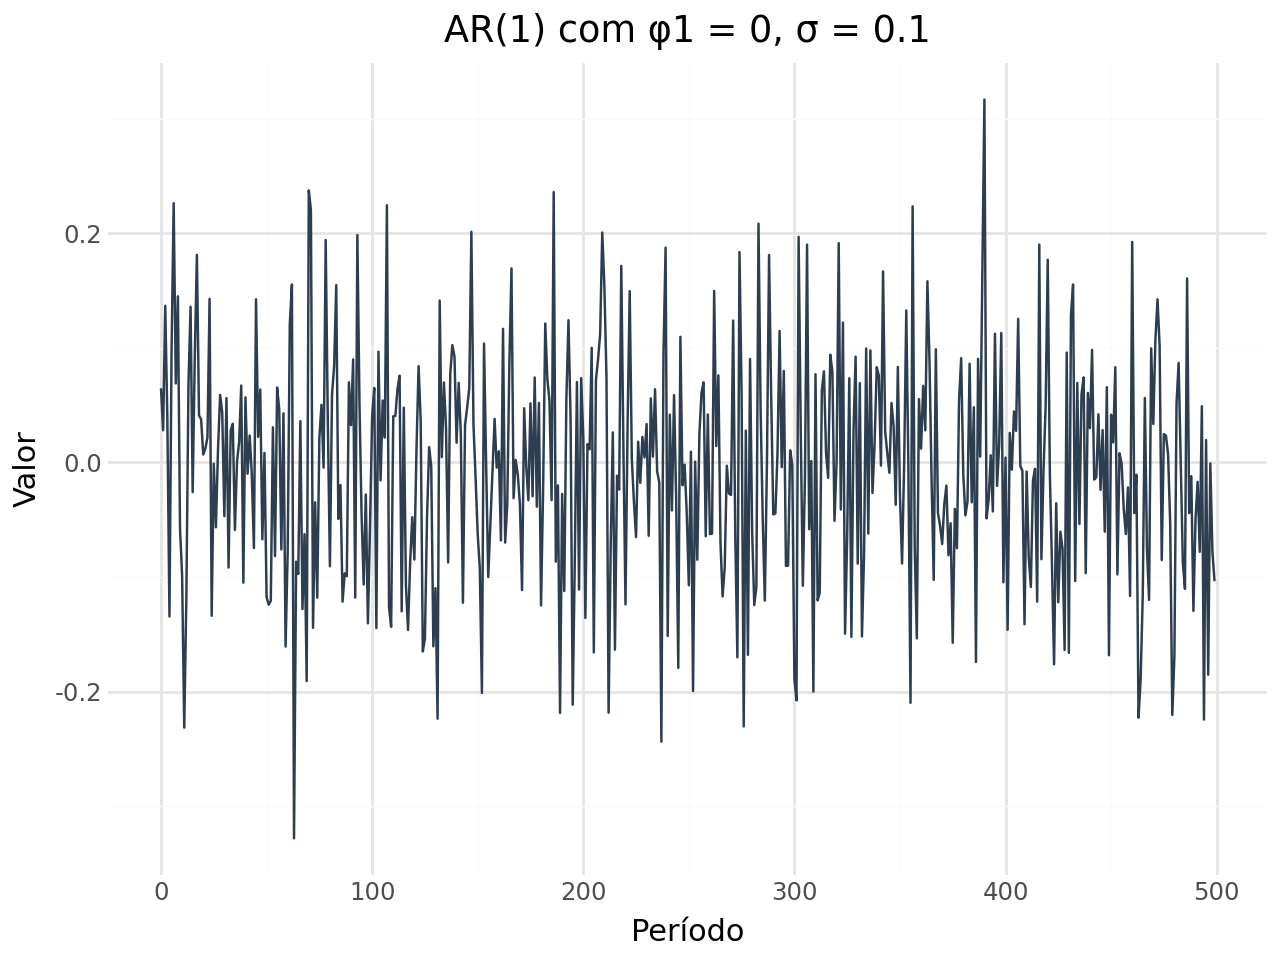

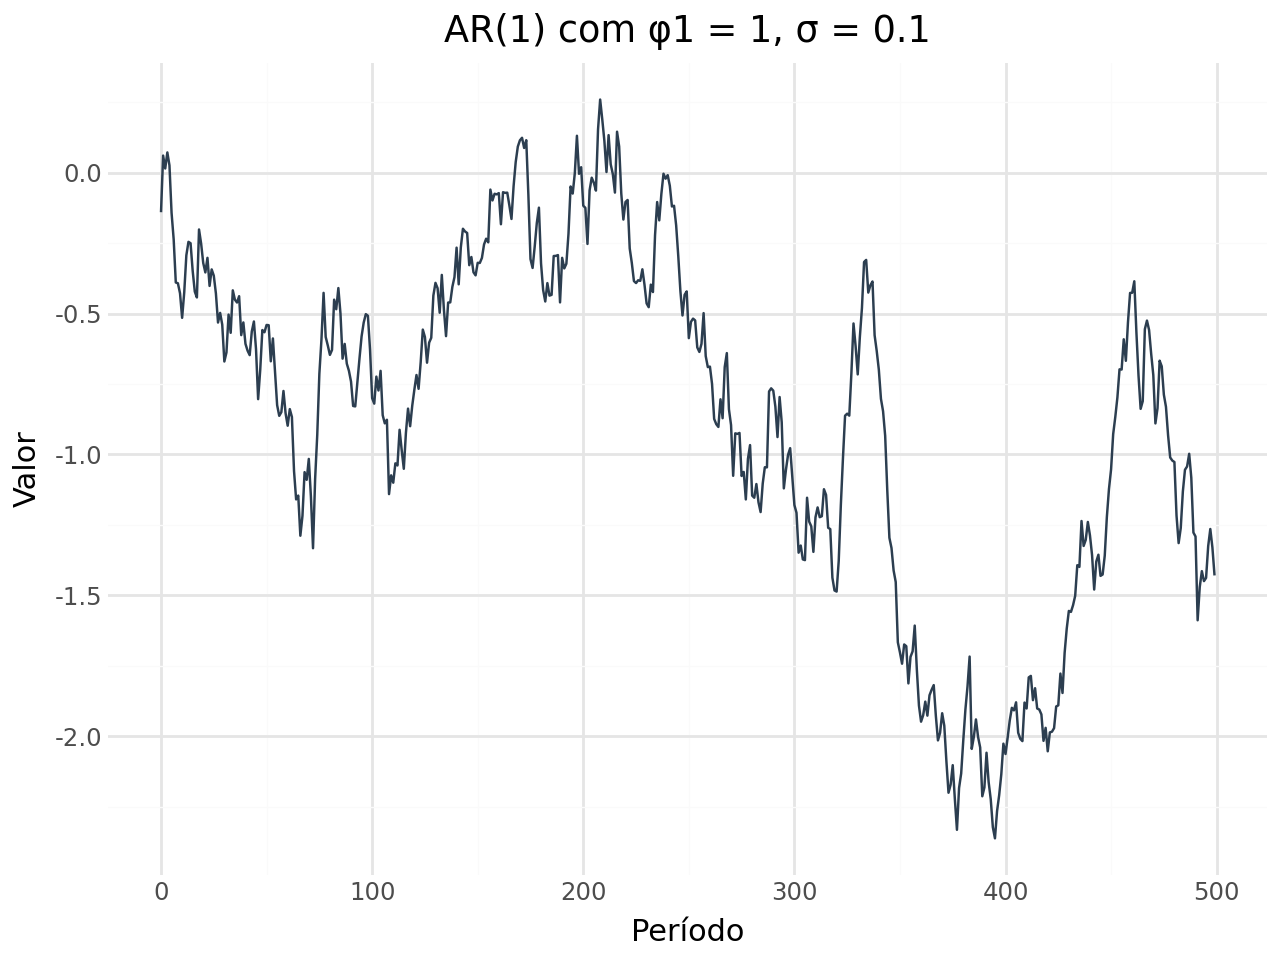

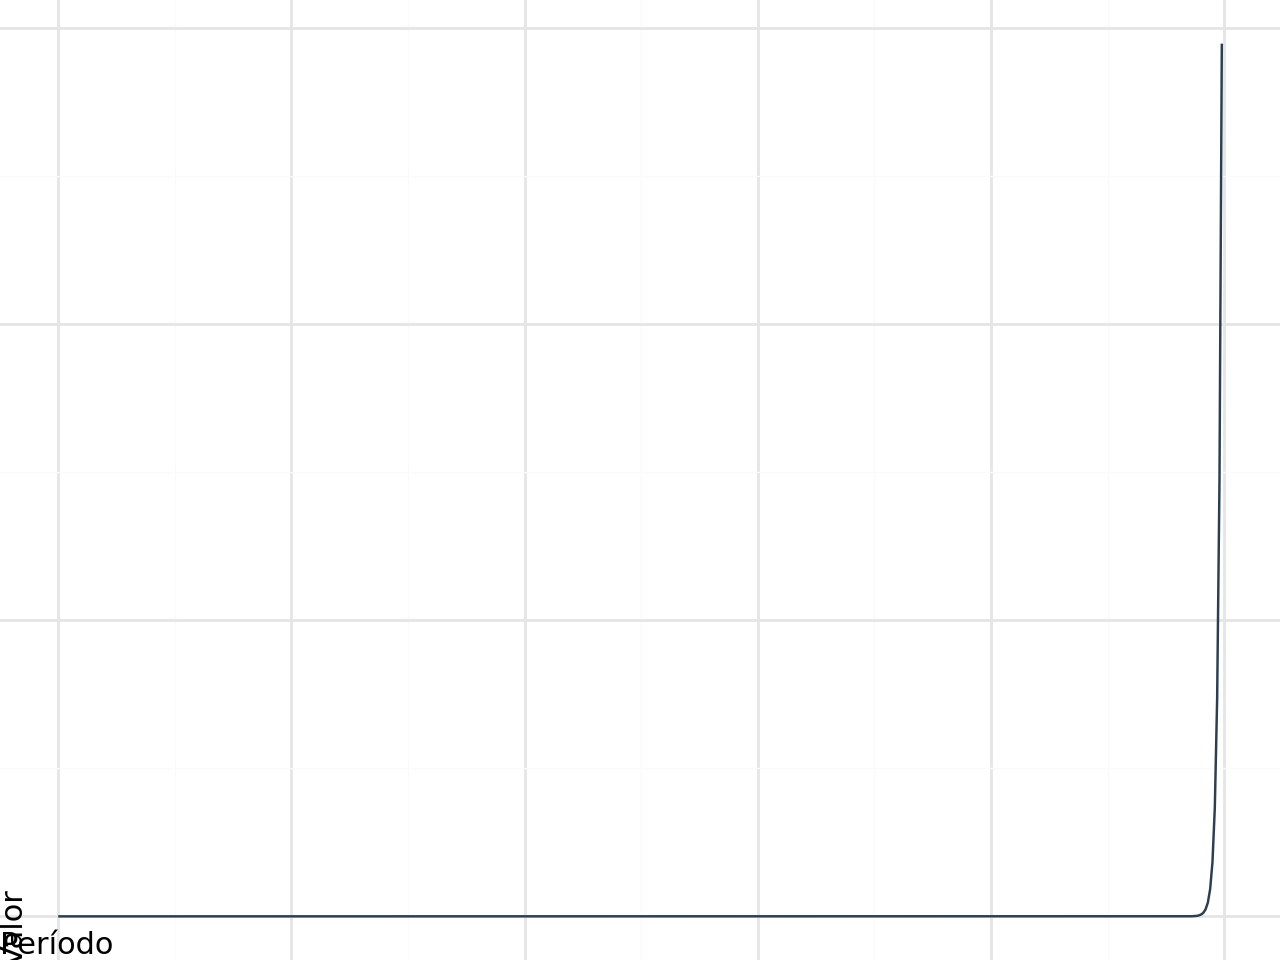

In [6]:
# testando diferentes plotagens usando phi1 = 0, 0.5, 1, -0.5, -1 para analisar o comportamento ceteris paribus

for phi1 in (-2,-1, 0, 1, 2):
    serie = ar1(phi1, 0.10, 500)
    plot_series(serie, title=f"AR(1) com φ1 = {phi1}, σ = 0.1")

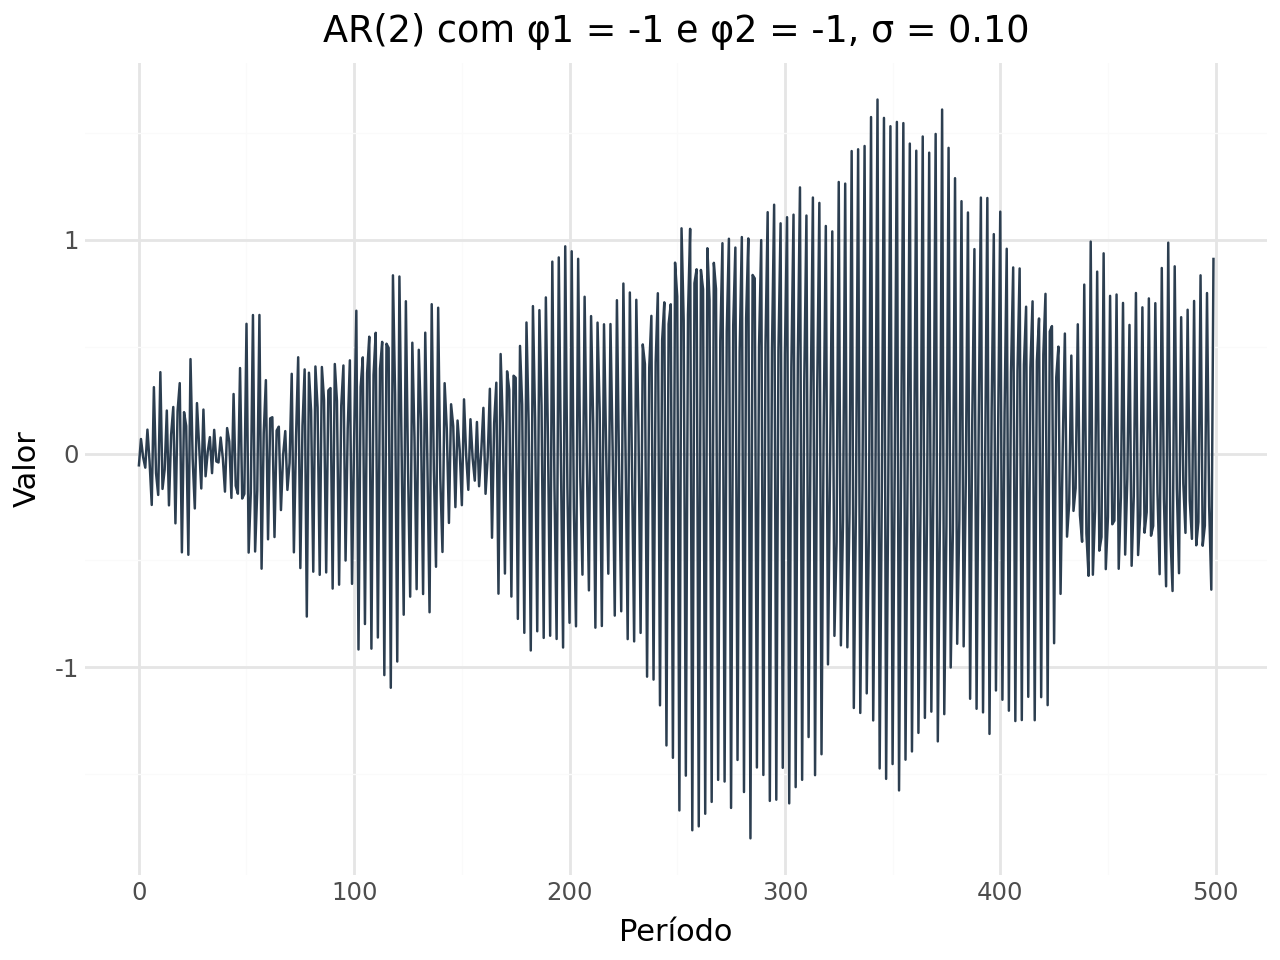

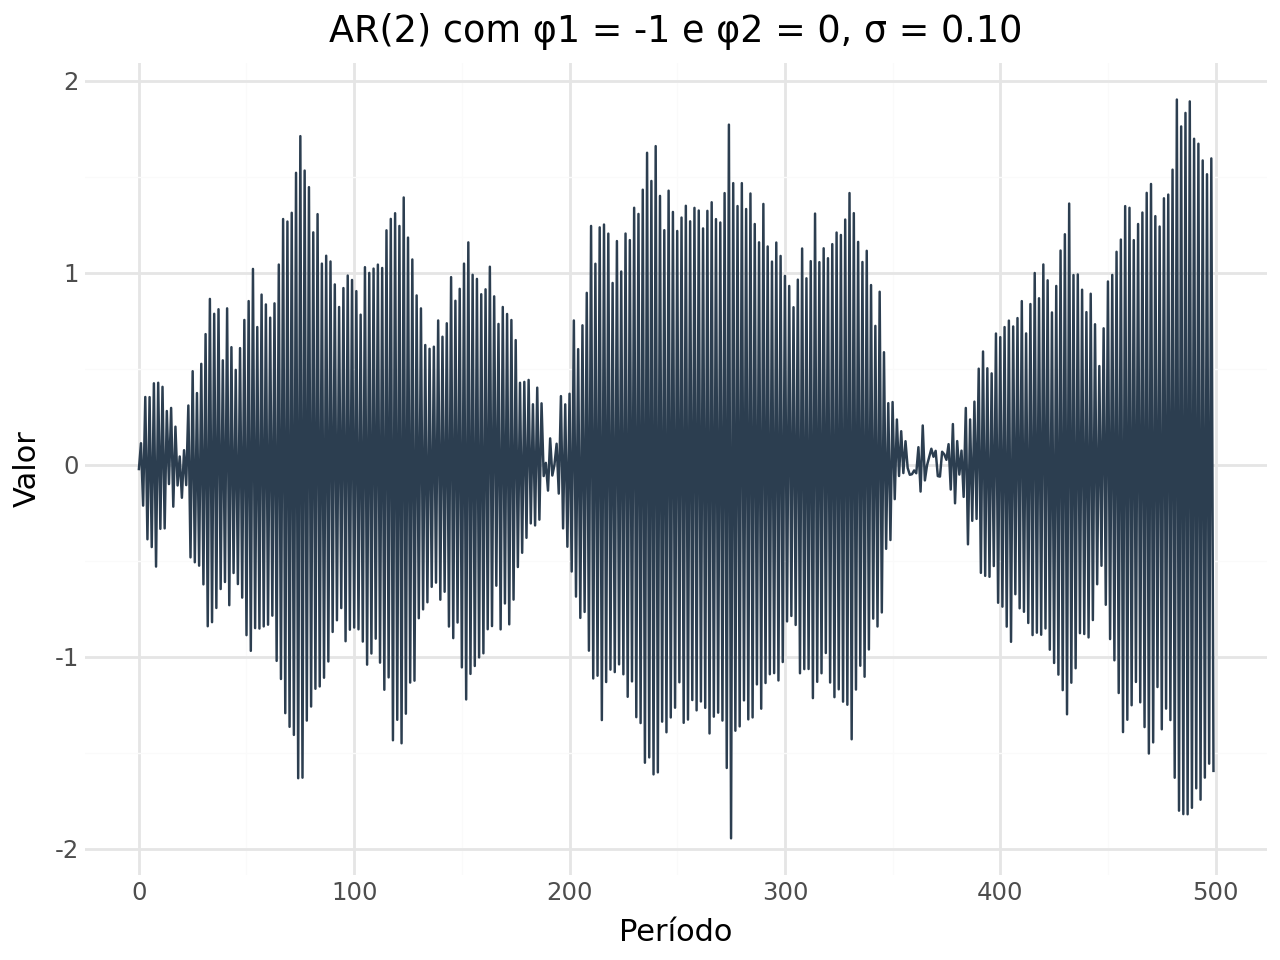

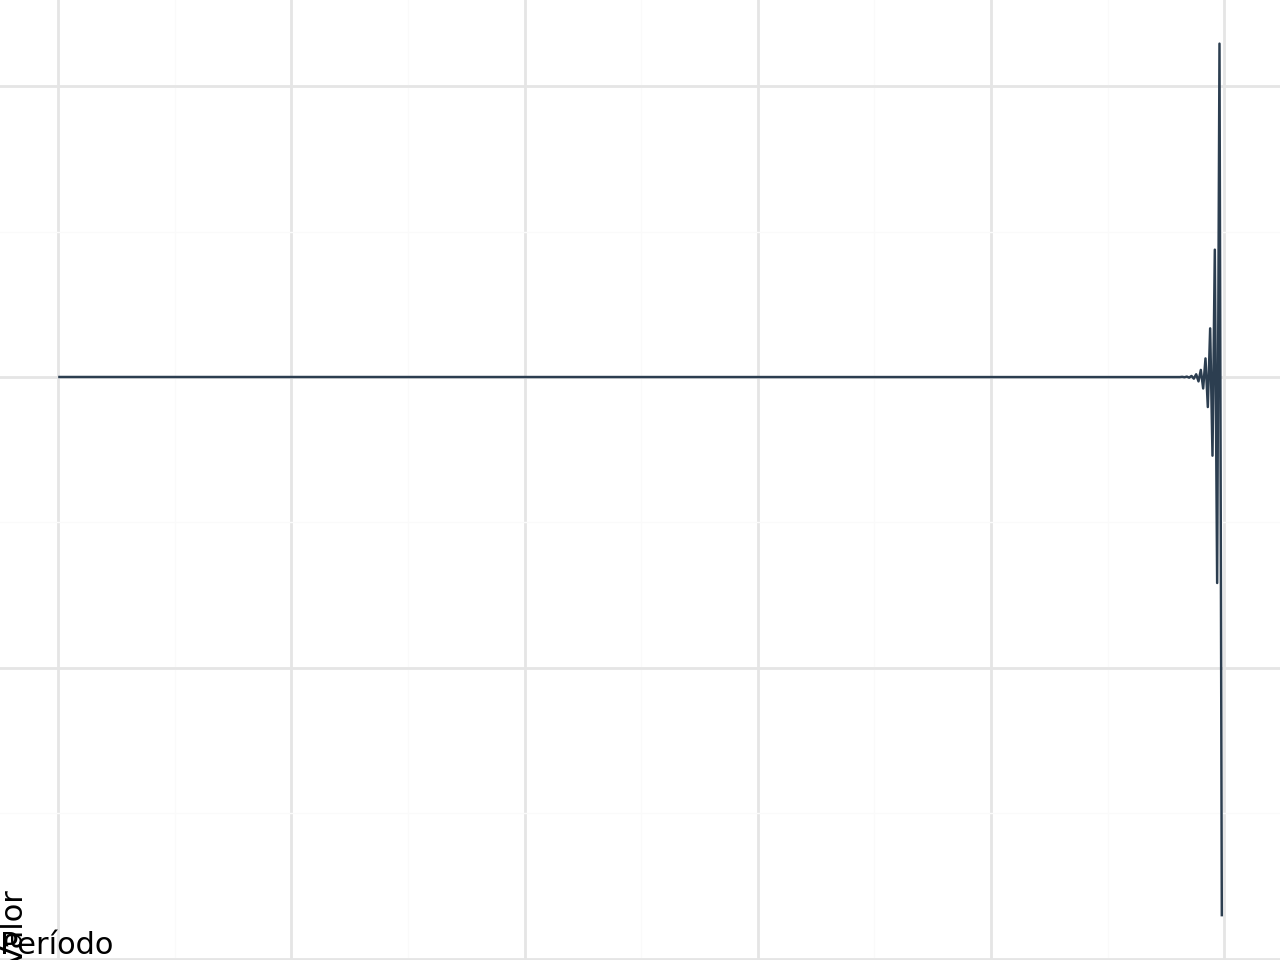

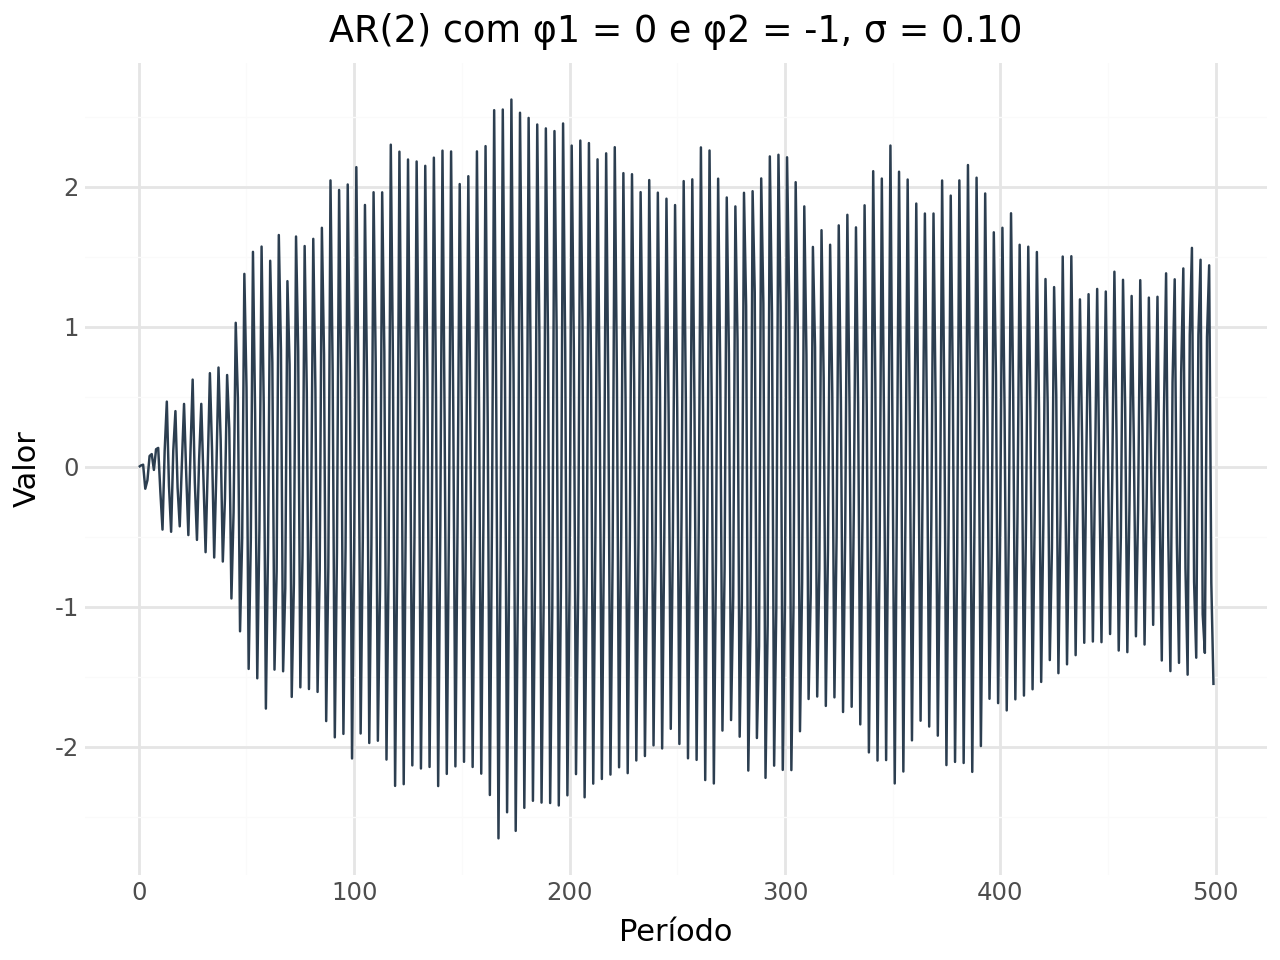

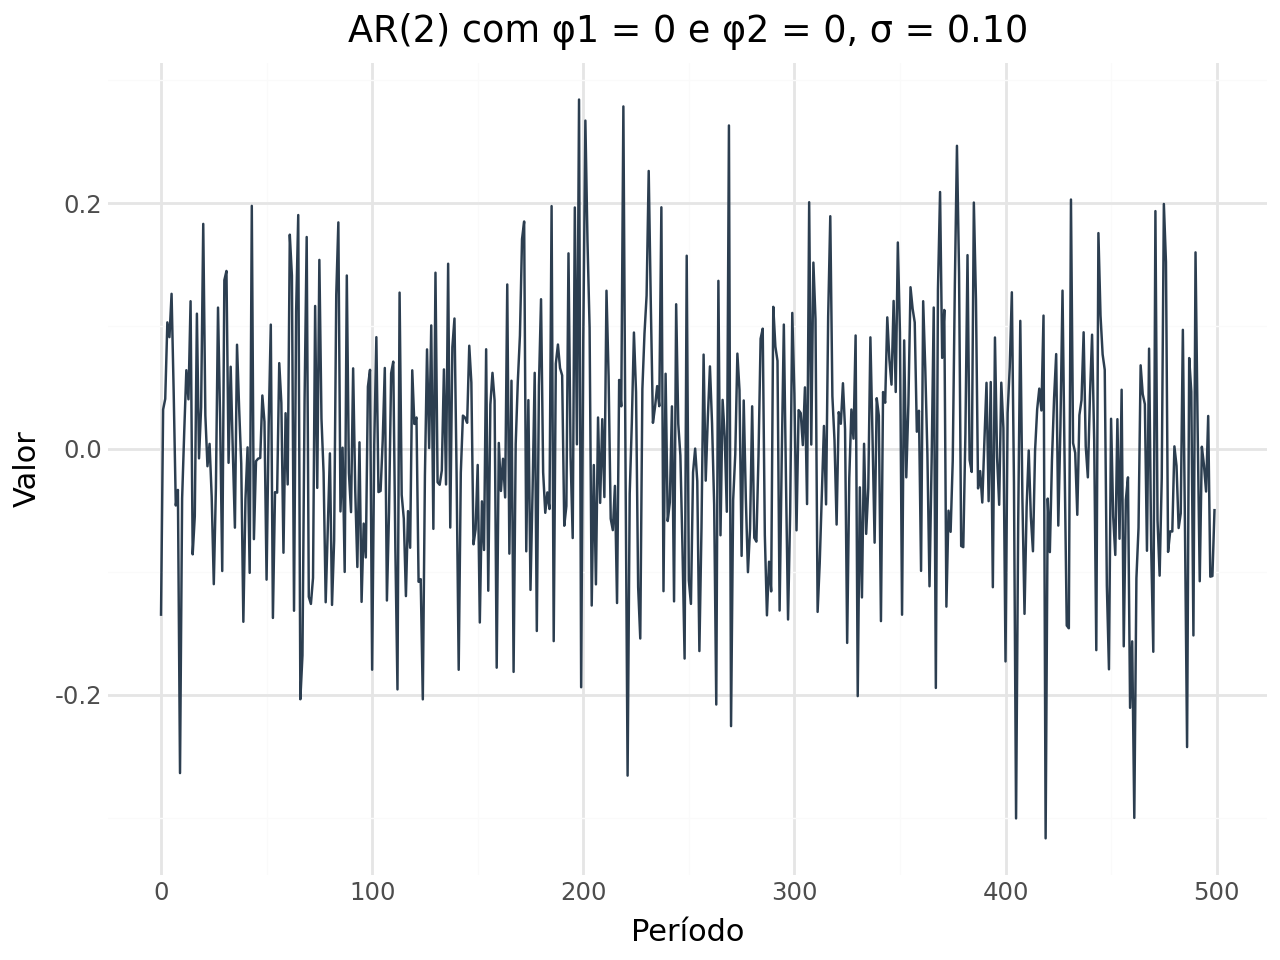

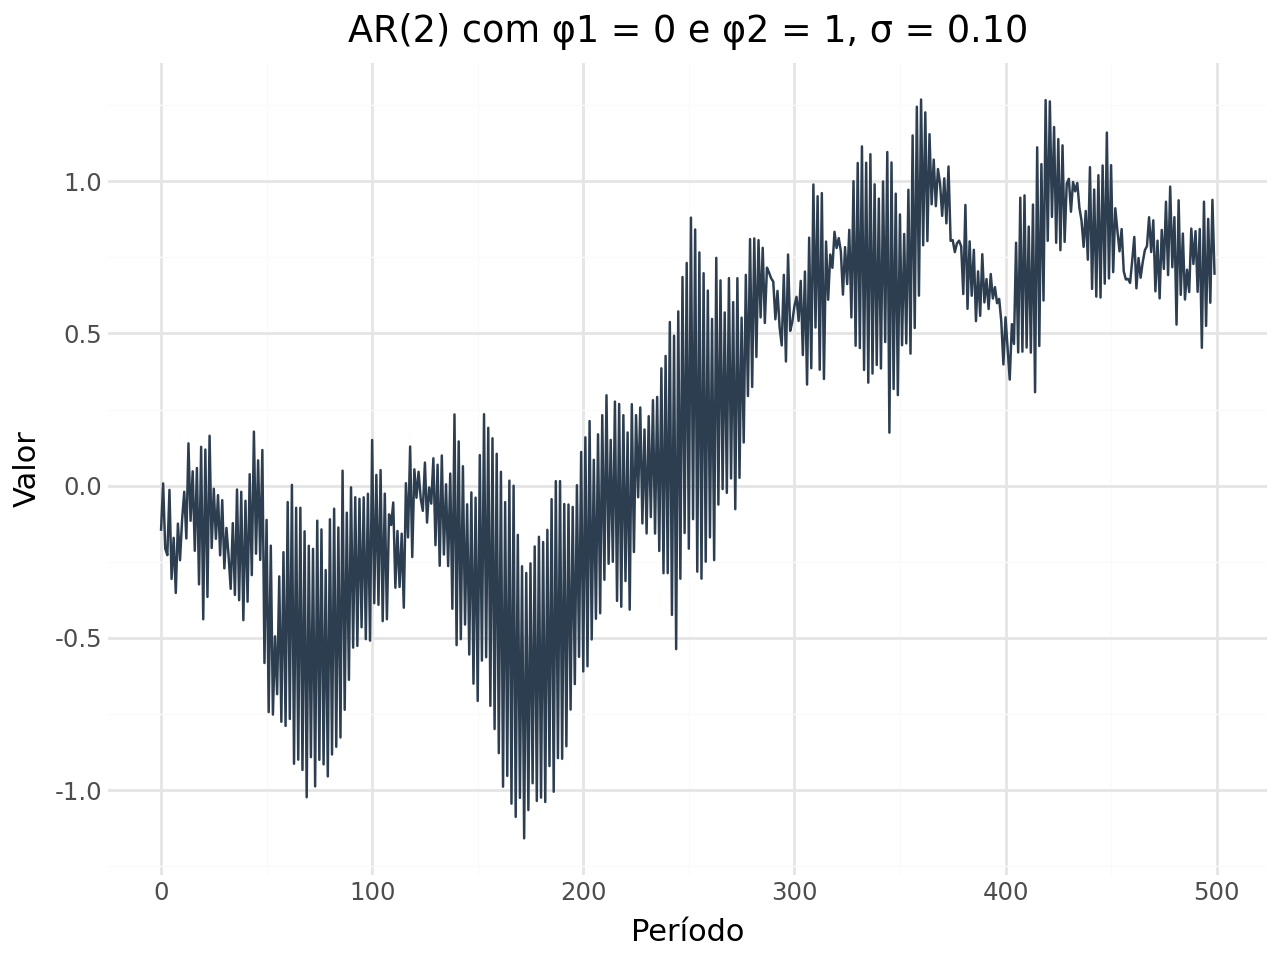

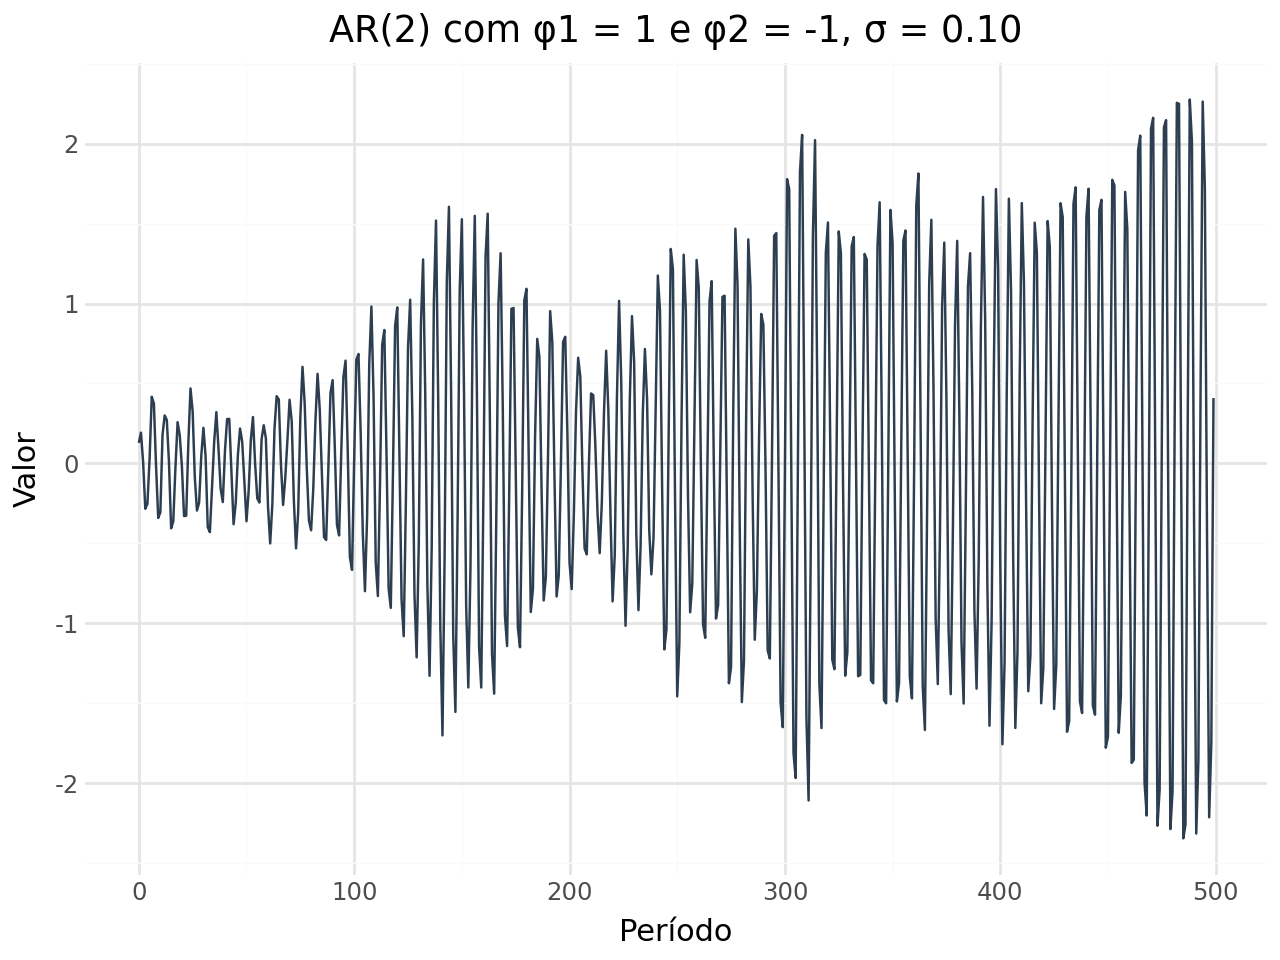

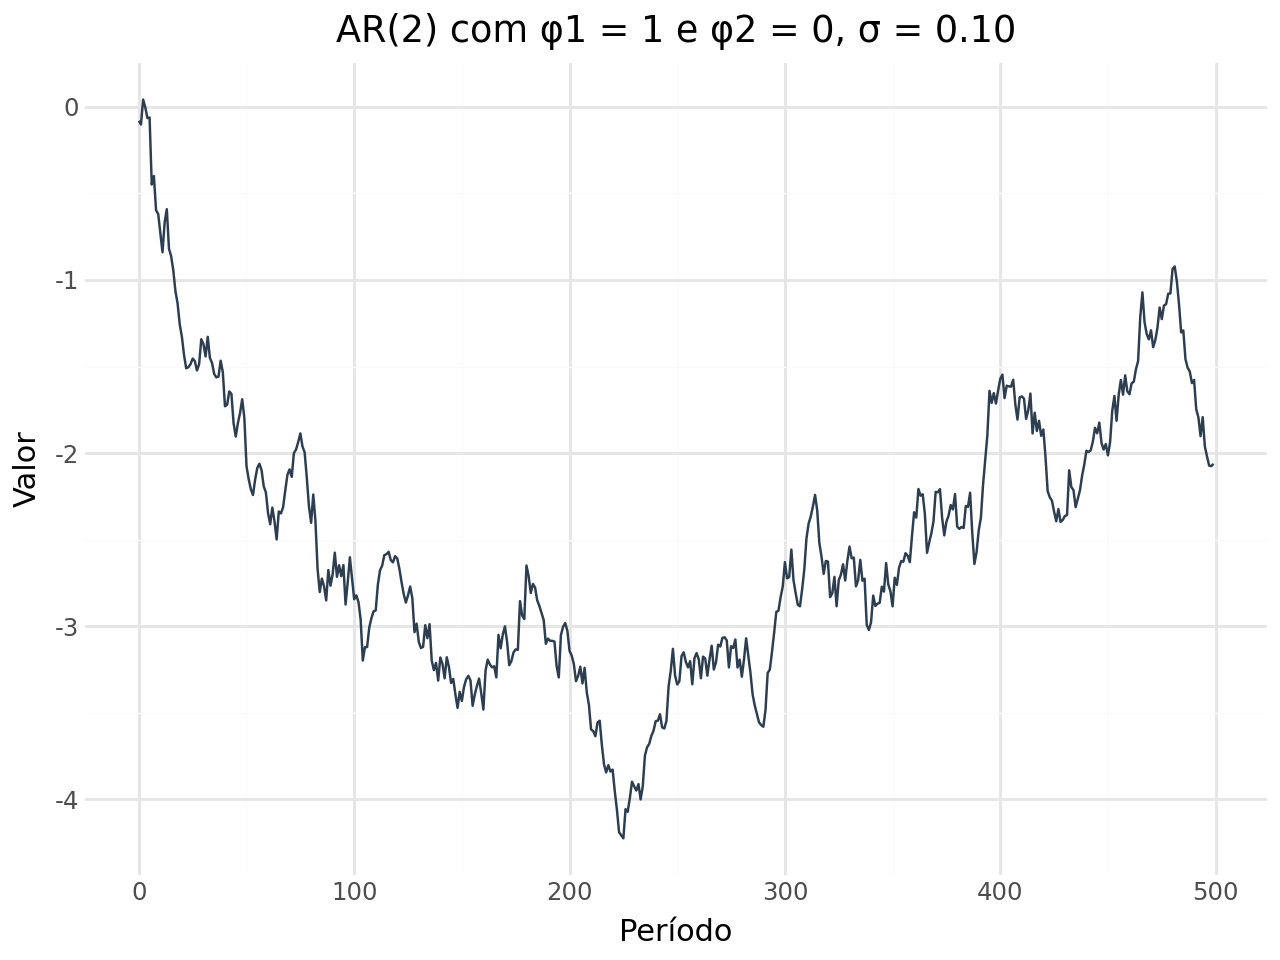

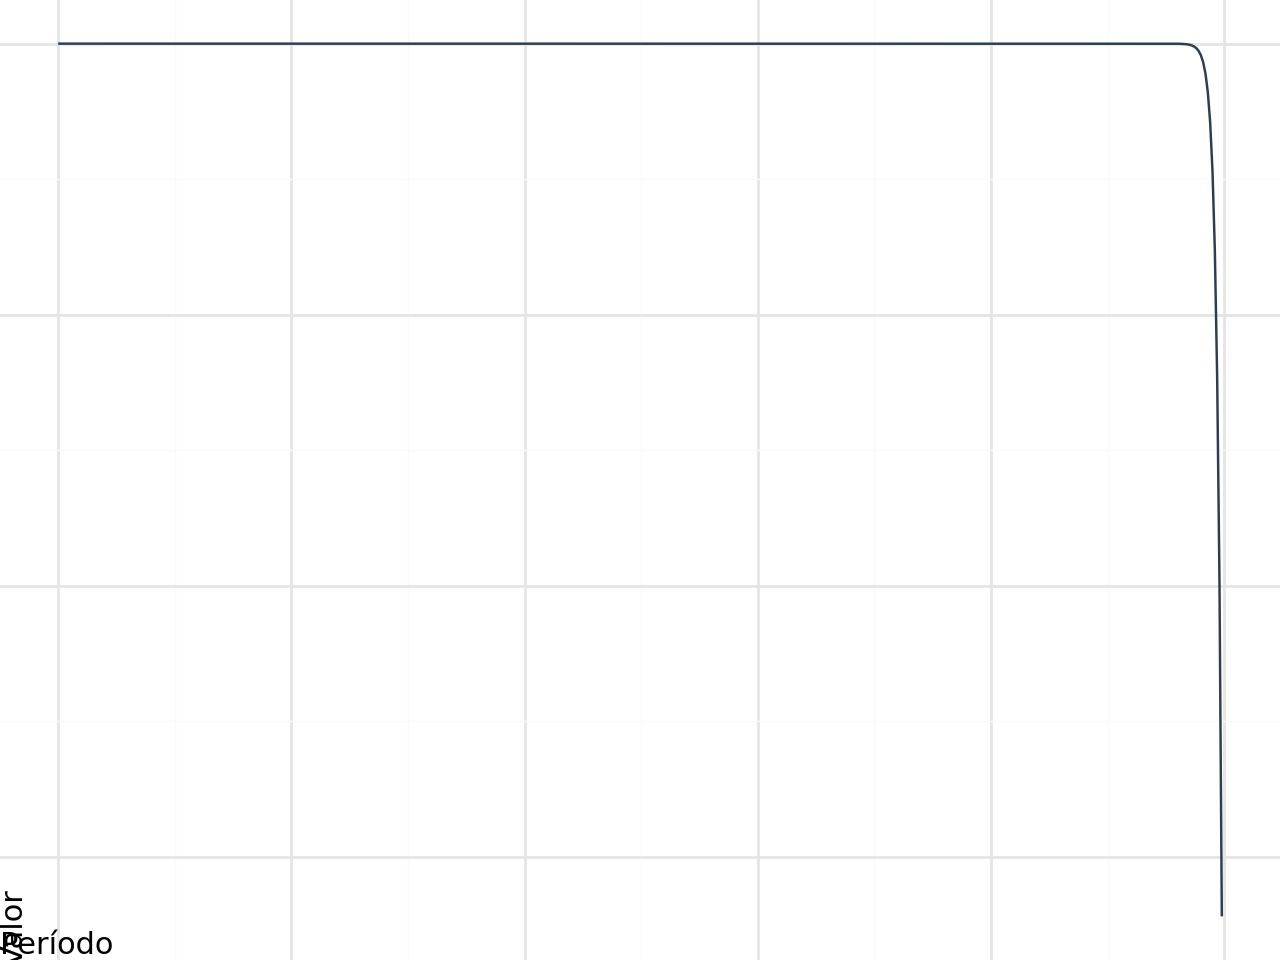

In [5]:
# testando diferentes plotagens usando phi1 e phi2 para analisar o comportamento ceteris paribus

for phi1 in (-1, 0, 1):
    for phi2 in (-1, 0, 1):
        serie = ar2(phi1, phi2, 0.10, 500)
        plot_series(serie, title=f"AR(2) com φ1 = {phi1} e φ2 = {phi2}, σ = 0.10")